# Portfolio Complex Systems Module 3 Properties of Complex Systems: Self-Organization and Emergence

Name: Femian Dooms

Student number: 2086229

Data: Timeseries data featuring power imbalance prices in the Netherlands + solar production measured in MW. Obtained from Tennet transparency (publicaly available).
91 data points measured from 01-01-2024 up untill 01-04-2024. Every datapoint is the mean price at time i where i is measured in days.

Sources used: -

In this module we will dive deeper into our dataset to analyse different properties of complex systems. 

Contents:

Theory about dynamic pattern forming

Visually inspecting solar production

PACF imbalance price and solar production

Phases in the dataset 




In [27]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Create df 
df = pd.read_csv('final_dataset.csv', delimiter=',')
df = df.groupby('Date')[['imbalance_price', 'wind_production', 'solar_production', 'gas_production']].mean().reset_index()


## Dynamic Pattern Formation
The dataset used consists of pricing data measured over a period of time. In this dataset we can find different features such as wind generation, solar generation and traditional gas generation. In order to understand the system better we will look at the dynamic pattern formation. This includes the complexity of substance problem and pattern complexity problem. 

### Substance complexity
In the context of time series data, the "substance" can be seen as the underlying structure or fundamental components that contribute to the observed patterns in the data. In this case we have financial time series (Power prices), thus fundamental componens can refer to the market dynamics that influence price movements such as solar and wind generation (low cost power genetarion = lower prices). As seen in the previous module (Module 2 Temporal signatures) we already saw that indeed our dataset is quite erratic (third order changes is prominent). This can be due to the complexity of the substances.  
To address the complexity of substance, we can use techniques such as feature engineering to extract meaningful features from the data set that capture the underlying factors driving the price movements. In addtion, dimensionality reduction methods like PCA can also help identify the most important components of the data. Both these methods can reduce the substane complexity.

### Pattern complexity
Pattern complexity refers to how the same set of components can manifest in various patterns or behaviors, as well as how different components can contribute to the same pattern. In the context of our time series data, this involves understanding how these patterns persists under different conditions (stability) and how these patterns adjust to internal and external conditions (adaptability).  


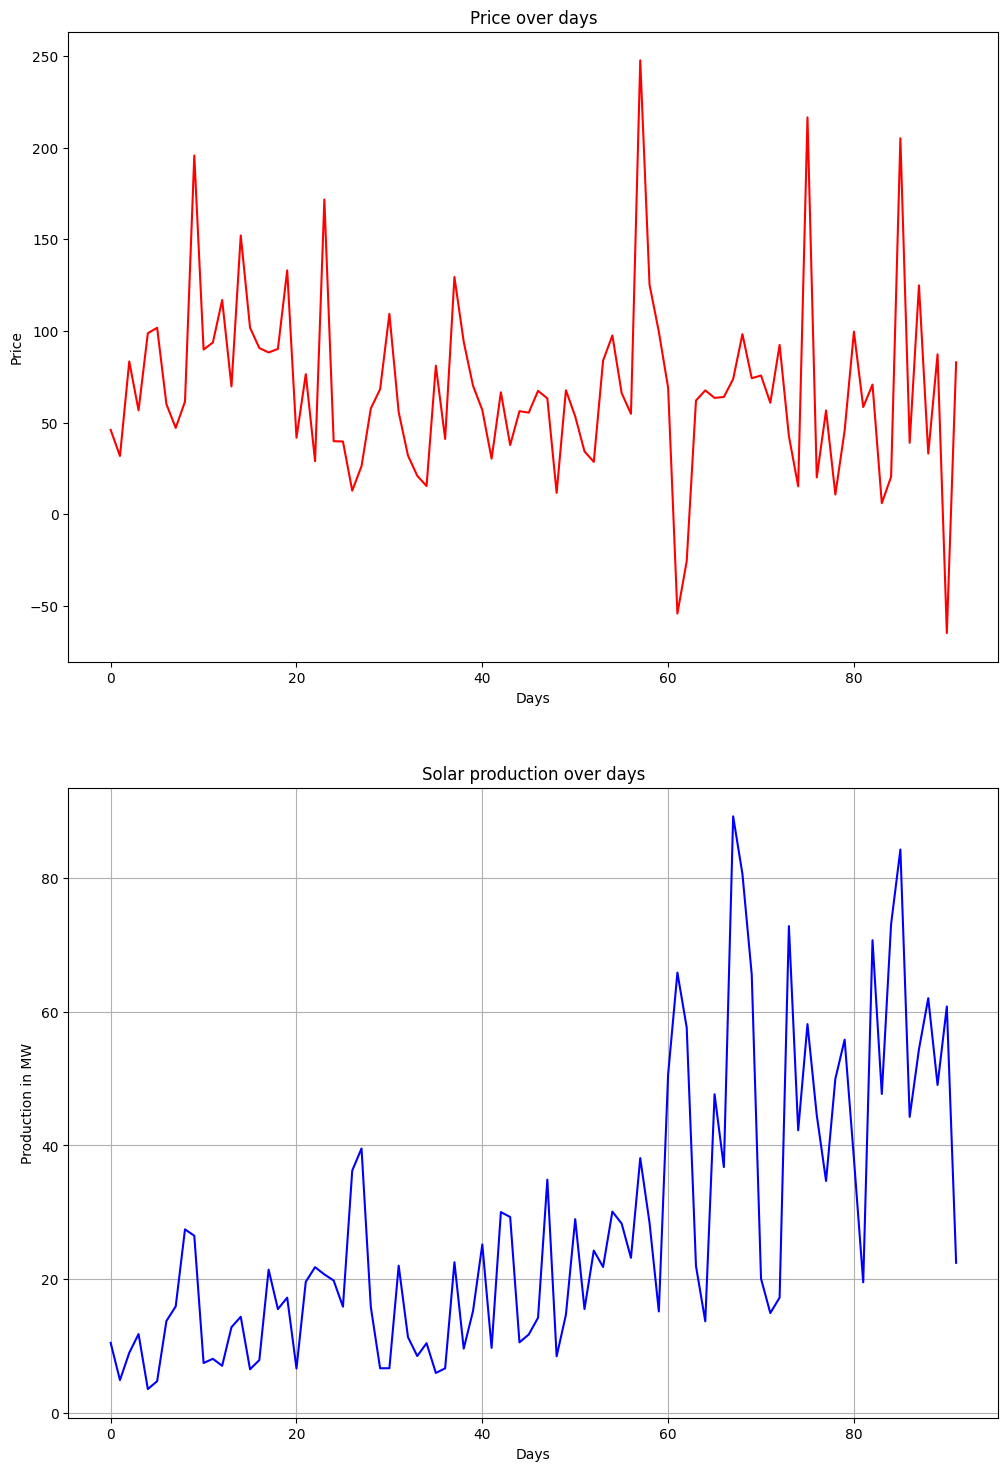

In [28]:

plt.figure(figsize=(12, 18))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['imbalance_price'], linestyle='-', color='r')
plt.title('Price over days')
plt.xlabel('Days')
plt.ylabel('Price')

plt.subplot(2, 1, 2)
plt.plot(df.index, df['solar_production'], linestyle='-', color='b')
plt.title('Solar production over days')
plt.xlabel('Days')
plt.ylabel('Production in MW')


# Show the plot
plt.grid(True)
plt.show()


## PACF
For the next we will dive into our price and solar timeseries dataset to see whether we are dealing with complex systems. After visualising 
We can see that imbalance prices have a long term dependency (lag 24), this means that data from 24 data points before has a correltation. Thus, we see some sort of long term periodic behaviour in the data set. This is not something we have seen visually. 

For solar we see something different, with values of lag of 1 and 5 we can conclude that there is short-term memory. This case, datapoint t is dependend on data point t-1.

<Figure size 1000x600 with 0 Axes>

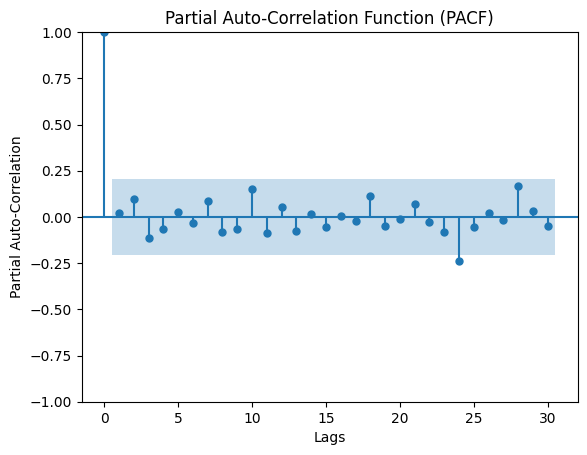

Significant lags (indicating short-term or long-term memory):
[ 0 24]
Lag 0 indicates short-term memory.
Lag 24 indicates long-term memory.


<Figure size 1000x600 with 0 Axes>

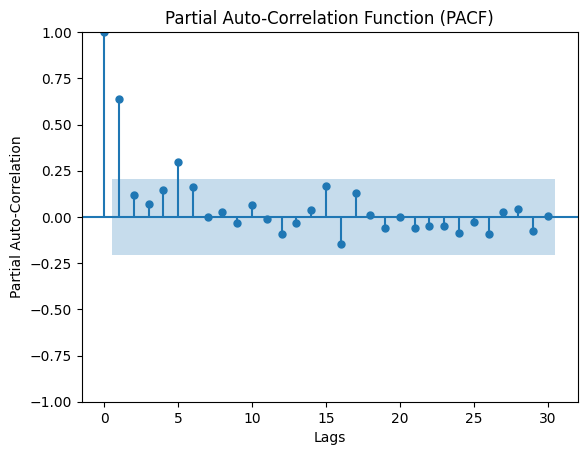

Significant lags (indicating short-term or long-term memory):
[0 1 5]
Lag 0 indicates short-term memory.
Lag 1 indicates short-term memory.
Lag 5 indicates short-term memory.


In [29]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

dates = df['Date']
prices = df['imbalance_price'].values
solar = df['solar_production'].values
# Compute and plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(prices, lags=30, method='ywm')
plt.title('Partial Auto-Correlation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Auto-Correlation')
plt.show()

# Compute the PACF values
pacf_values = pacf(prices, nlags=30, method='ywm')

# Identify significant lags
threshold = 1.96 / np.sqrt(len(prices))  # 95% confidence interval
significant_lags = np.where(np.abs(pacf_values) > threshold)[0]

print("Significant lags (indicating short-term or long-term memory):")
print(significant_lags)

if len(significant_lags) == 0:
    print("No significant lags found, indicating no short-term or long-term memory.")
else:
    for lag in significant_lags:
        if lag <= 5:
            print(f"Lag {lag} indicates short-term memory.")
        else:
            print(f"Lag {lag} indicates long-term memory.")


            
# Compute and plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(solar, lags=30, method='ywm')
plt.title('Partial Auto-Correlation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Auto-Correlation')
plt.show()

# Compute the PACF values
pacf_values = pacf(solar, nlags=30, method='ywm')

# Identify significant lags
threshold = 1.96 / np.sqrt(len(solar))  # 95% confidence interval
significant_lags = np.where(np.abs(pacf_values) > threshold)[0]

print("Significant lags (indicating short-term or long-term memory):")
print(significant_lags)

if len(significant_lags) == 0:
    print("No significant lags found, indicating no short-term or long-term memory.")
else:
    for lag in significant_lags:
        if lag <= 5:
            print(f"Lag {lag} indicates short-term memory.")
        else:
            print(f"Lag {lag} indicates long-term memory.")


## Phases in the dataset
Now, we will see whether we can see different phases in the data points for imbalance price.

Change Point Detection: We use the ruptures library for change point detection. For this we can tune the algo by selecting which type of model we want to use and the number of change points we want. Setting the number of change points to 6 results in the best way to anaylyse each segement. This is because it can take the large fluctuations beter into account. 
Visualization: Plotting the data with change points.
Descriptive Statistics: Calculating statistics for each phase.

<Figure size 1000x600 with 0 Axes>

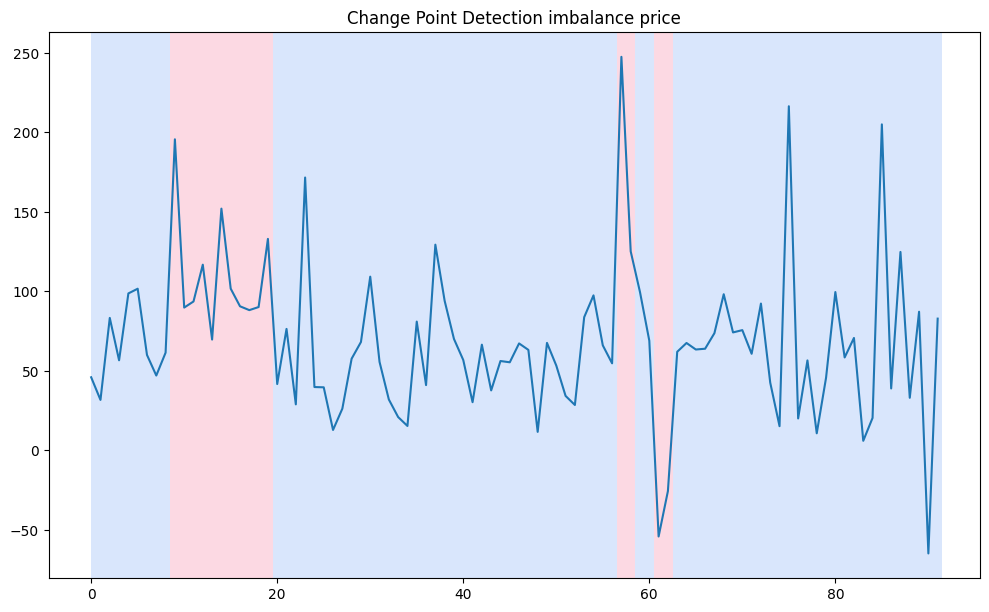

Segment 1:
Mean: 111.07041193181819
Variance: 1206.9397172311267
ACF: [ 1.         -0.23863677 -0.07173806  0.01898963 -0.33447031  0.42591844
 -0.07441418 -0.05669799 -0.14081246 -0.16820681  0.1400685 ]
PACF: [ 1.         -0.26250045 -0.16817466 -0.04965063 -0.60550412]

Segment 2:
Mean: 57.95456644144145
Variance: 1064.5733715534461
ACF: [ 1.          0.00356863  0.04875619 -0.36139105 -0.29108839 -0.07313129
 -0.10734509  0.40438329  0.11604144  0.04570185 -0.16210212 -0.30650832
  0.0295589  -0.26500094  0.21803627  0.07126595]
PACF: [ 1.00000000e+00  3.66775375e-03  5.15294994e-02 -3.94700133e-01
 -3.78027962e-01 -1.04685683e-01 -3.63716474e-01  2.51600847e-01
  6.76033999e-02 -2.41710814e-01 -1.08955393e-01 -4.04112975e-01
 -2.06630832e-02 -7.64970680e-01 -1.22859937e+00  5.12618258e+00]

Segment 3:
Mean: 186.36809895833332
Variance: 3742.3965560065362
ACF: [ 1.  -0.5]
PACF: [ 1. -1.]

Segment 4:
Mean: 84.28226562500001
Variance: 233.41871631469752
ACF: [ 1.  -0.5]
PACF: [ 1. -1

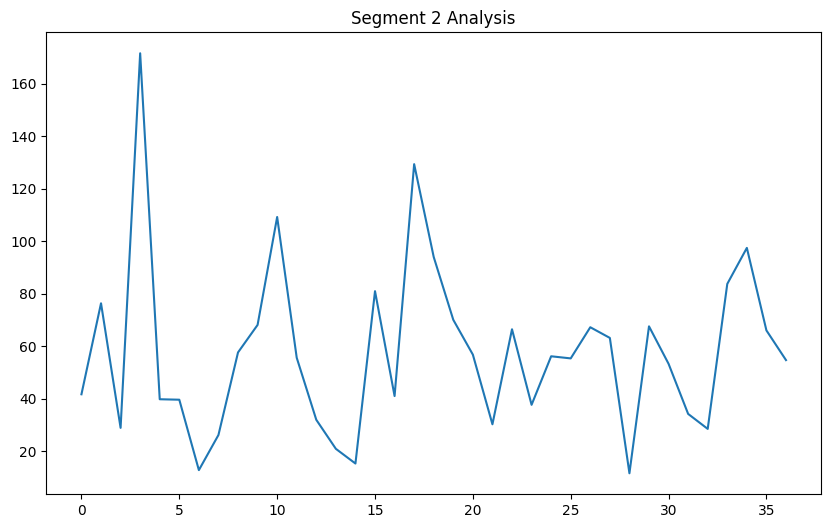

In [30]:
import ruptures as rpt
from statsmodels.tsa.stattools import acf, pacf

# Change point detection
model = "l2"  # model type: "l1", "l2", "rbf"
algo = rpt.KernelCPD(kernel="linear").fit(prices)
result = algo.predict(n_bkps=6)  # Number of change points

# Visualization
plt.figure(figsize=(10, 6))
rpt.display(prices, result, figsize=(10, 6))
plt.title('Change Point Detection imbalance price')
plt.show()

# Segment-wise Analysis
for i in range(len(result) - 1):
    segment = prices[result[i]:result[i + 1]]
    print(f"Segment {i+1}:")
    print(f"Mean: {np.mean(segment)}")
    print(f"Variance: {np.var(segment)}")
    print(f"ACF: {acf(segment)}")
    print(f"PACF: {pacf(segment)}")
    print()

segment = prices[result[1]:result[2]]
plt.figure(figsize=(10, 6))
plt.plot(segment)
plt.title('Segment 2 Analysis')
plt.show()


## Phases in the dataset: Results
Lets late a closer look at the segments we created. For this we shall look closely at two larger clusters: Segment 2 and 3.

### Segment 2
High Variance: The high variance suggests that this segment has substantial variability in the data points, which could be due to volatility or significant events affecting the system.

Autocorrelation Patterns:

Lag 3 and Lag 7: Significant correlations at these lags indicate periodic behavior or seasonality in the data. The negative and positive correlations at different lags suggest a complex interplay of forces affecting the system.

Partial Autocorrelation:

The notable values at lags 3, 7, and 15 indicate that there are specific time intervals where the past values have a strong influence on the current value, beyond the influence of intermediate values. The high value at lag 7 and 15 suggests that there might be a specific event or recurring pattern at this interval.In this case as it is measured in days, we can conclude that the day of the week can have a big influence on the data points. 


### Segment 3
High Mean and Variance: The mean value is significantly higher than in Segment 2, and the variance is also much larger. This indicates that the data points in Segment 3 are centered around a higher value and are more spread out, suggesting a different regime with potentially higher volatility or more significant events influencing the data.

Strong Negative Autocorrelation:

The strong negative autocorrelation at lag 1 in both ACF and PACF suggests a clear pattern where each data point tends to be followed by its opposite. This could indicate cyclical or oscillatory behavior, where the system alternates between high and low states.
Simpler Dynamics:

Compared to Segment 2, the ACF and PACF of Segment 3 suggest simpler dynamics dominated by a strong alternating pattern at lag 1. There are no higher-lag autocorrelations provided, which suggests that the main dynamic at play is the immediate negative correlation.


## Conclusion
In this module we have taken a closer look at our dataset. We see that there is a high dependency on long term data points which shows there is some periodic pattern. When we look closer and divide the dataset into segments, we find that there are more short term dependencies than we initially expected. 